In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
bank_df = pd.read_csv("azcabgptca.csv")

In [4]:
bank_df.head(10) 

,Unnamed: 0,died,procedure,age,gender,los,type
0,1,0,1,73,0,51,0
1,2,0,0,67,0,30,1
2,3,0,1,69,0,43,0
3,4,0,1,65,0,32,0
4,5,0,1,79,0,42,1
5,6,0,1,68,0,33,1
6,7,0,0,74,0,22,1
7,8,0,1,66,0,30,1
8,9,0,1,66,0,30,0
9,10,0,0,65,1,9,1


In [5]:
bank_df.shape

(1959, 7)

In [8]:
X = bank_df.drop('died', axis = 1)
y = bank_df.pop('died')

In [9]:
bank_df.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1959 entries, 0 to 1958
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  1959 non-null   int64
 1   procedure   1959 non-null   int64
 2   age         1959 non-null   int64
 3   gender      1959 non-null   int64
 4   los         1959 non-null   int64
 5   type        1959 non-null   int64
dtypes: int64(6)
memory usage: 92.0 KB


In [10]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=0)


# Ensemble RandomForest Classifier

In [11]:
rfcl = RandomForestClassifier(n_estimators = 500)
rfcl = rfcl.fit(X_train, train_labels)

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
   
    'n_estimators': [500]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)



In [40]:
grid_search.fit(X_train, train_labels)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [500]})

In [41]:
grid_search.best_params_

{'n_estimators': 500}

In [42]:
best_grid = grid_search.best_estimator_

In [43]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix,classification_report

In [45]:
confusion_matrix(train_labels,ytrain_predict)

array([[1346,    0],
       [   0,   25]], dtype=int64)

In [46]:
confusion_matrix(test_labels,ytest_predict)

array([[573,   4],
       [  9,   2]], dtype=int64)

In [47]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1346
           1       1.00      1.00      1.00        25

    accuracy                           1.00      1371
   macro avg       1.00      1.00      1.00      1371
weighted avg       1.00      1.00      1.00      1371



In [48]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       577
           1       0.33      0.18      0.24        11

    accuracy                           0.98       588
   macro avg       0.66      0.59      0.61       588
weighted avg       0.97      0.98      0.97       588



In [49]:
import matplotlib.pyplot as plt

AUC: 1.000


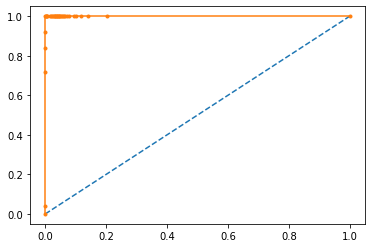

In [50]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.78


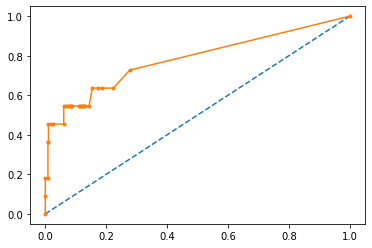

In [51]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.2f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()